# EDA 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
%matplotlib inline

In [3]:
dreams_df = pd.read_csv("../data/processed/balanced_train.csv",index_col=0)
print("Shape: ",dreams_df.shape)
dreams_df




Shape:  (1200, 15)


text_cleaned         Z1         Z2  \
119   dream huge dark house random scary guy laptop ...  11.434967   9.702437   
96    dream write essay spanish embarrass thing ever...  10.858532  11.255005   
444   bizarre dream dreamt like friend house like th...   5.332724  11.170893   
435   last night dreamt somehow get pregnant make gu...   5.525874  11.255989   
511   tell crush jose water give bottle middle discu...  10.520965   9.981382   
...                                                 ...        ...        ...   
1238  female friend invite dinner show idea commerci...   9.871925   9.876723   
1638  theater rehearse play write purchase costume j...  13.770313  13.801302   
1724  get ready take matthew hospital surgery bill g...  12.770587  12.896379   
1294  train depot son nephew tell nephew sure buy gi...   9.152035   9.964938   
1459  barry apartment wake morning bed listen daught...  11.285213  13.392076   

      nb_words  anger  anticipation  disgust  fear  joy  sadness  surprise  \
119        300      4             6        4     4    3        7         2   
96          61      1             1        1     1    0        1         1   
444        329      0             2        2     2    3        2         2   
435        350      1             4        2     3    4        6         1   
511         34      0             0        0     0    0        0         0   
...        ...    ...           ...      ...   ...  ...      ...       ...   
1238        64      2             0        0     1    1        2         0   
1638       540      0             7        3     1    5        3         1   
1724       189      0             1        1     4    1        2         1   
1294       124      1             5        0     1    4        2         5   
1459        63      0             0        0     0    2        1         0   

      trust  negative  positive  target  
119       3         8         5       0  
96        2         4         2       0  
444       7         4         7       0  
435       5         7         6       0  
511       0         0         1       0  
...     ...       ...       ...     ...  
1238      1         2         3       2  
1638      5        10         9       2  
1724      5         1         3       2  
1294      3         3         6       2  
1459      0         0         3       2  

[1200 rows x 15 columns]

In [4]:
# Información general: number y date no se usarán
dreams_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 119 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text_cleaned  1200 non-null   object 
 1   Z1            1200 non-null   float64
 2   Z2            1200 non-null   float64
 3   nb_words      1200 non-null   int64  
 4   anger         1200 non-null   int64  
 5   anticipation  1200 non-null   int64  
 6   disgust       1200 non-null   int64  
 7   fear          1200 non-null   int64  
 8   joy           1200 non-null   int64  
 9   sadness       1200 non-null   int64  
 10  surprise      1200 non-null   int64  
 11  trust         1200 non-null   int64  
 12  negative      1200 non-null   int64  
 13  positive      1200 non-null   int64  
 14  target        1200 non-null   int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 150.0+ KB


# Análisis univariable

target
0    400
1    400
2    400
Name: count, dtype: int64


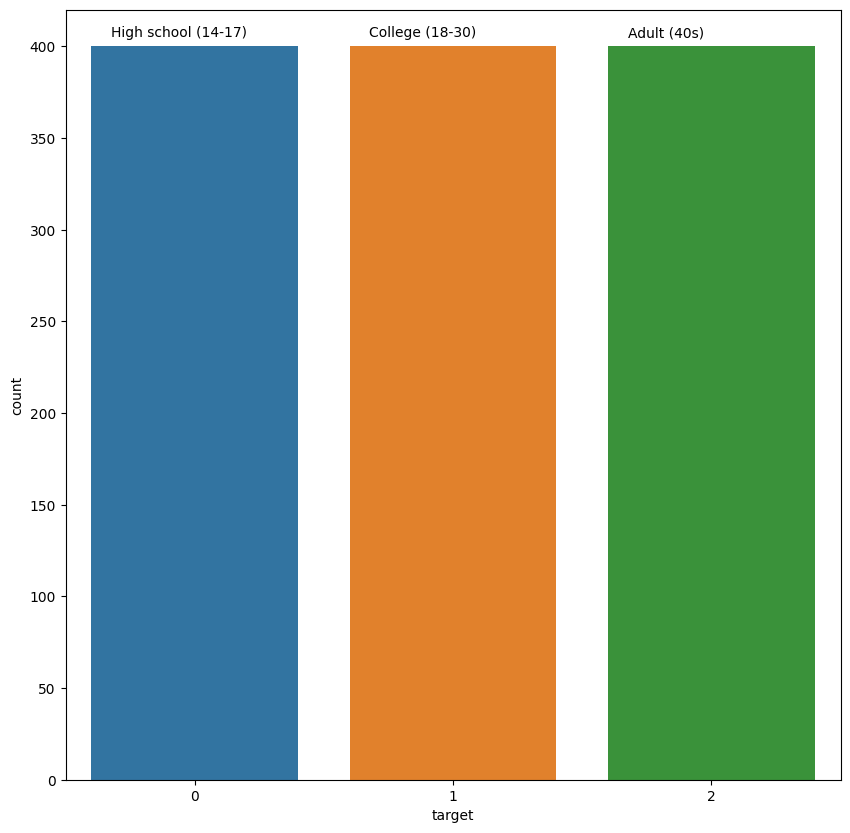

In [5]:
#  Visualizamos las categorías a predecir
uni = dreams_df['target'].value_counts()
print(uni)
plt.figure(figsize=(10,10))
ax = sns.countplot(data=dreams_df,x='target')

for p, label in zip(ax.patches, ["High school (14-17)","College (18-30)","Adult (40s)"]):
    ax.annotate(label, (p.get_x()+0.075, p.get_height()+5))
plt.show()

# Sentimientos dependiendo de época y distribucion de numero de palabras (posible error en el dataset original, la proporción es muy parecida en las 3 edades)

In [6]:
dreams_num = dreams_df.iloc[:,1:]

Medias: 192.1425 195.2275 242.245
Medianas: 161.5 165.0 127.0


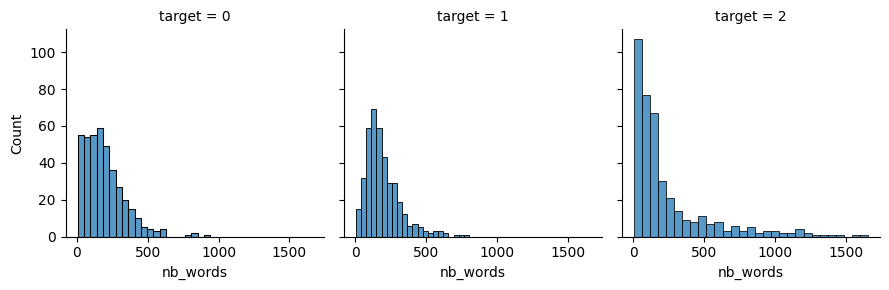

In [7]:
# Palabras en los textos
highschool = dreams_num.query("target == 0")
college = dreams_num.query("target == 1")
adult = dreams_num.query("target == 2")
sum_h = highschool.sum(axis=0)
sum_h
g = sns.FacetGrid(dreams_df, col="target")
g.map(sns.histplot, "nb_words")

print("Medias:", highschool.nb_words.mean(), college.nb_words.mean(), adult.nb_words.mean())
print("Medianas:", highschool.nb_words.median(), college.nb_words.median(), adult.nb_words.median())

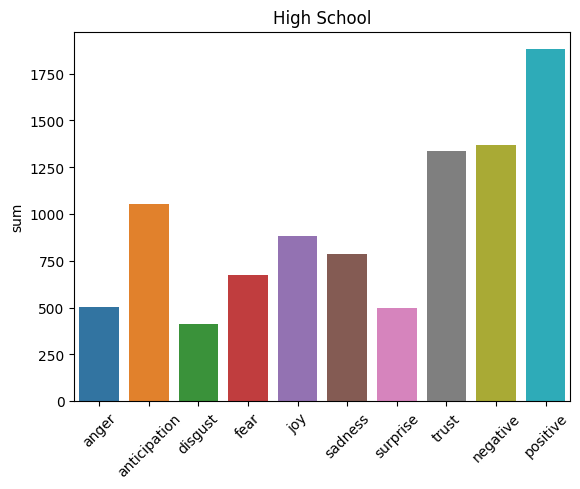

In [8]:
# Suma total de las columnas de emociones
highschool_sum = pd.DataFrame(highschool.sum().iloc[3:-1], columns=['sum'])
highschool_sum
sns.barplot(data=highschool_sum, x=highschool_sum.index, y="sum").set(title='High School')
plt.xticks(rotation=45)
plt.show()

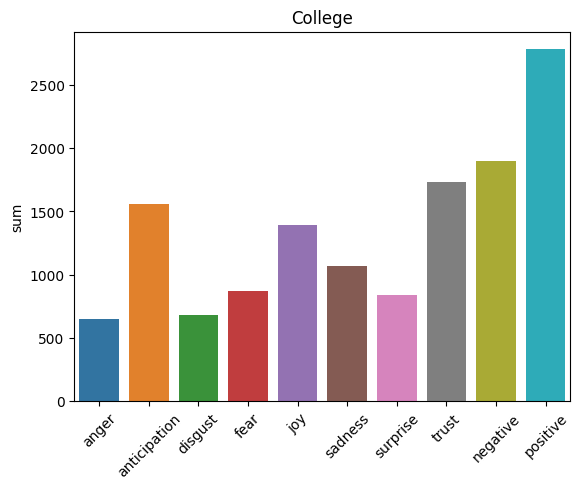

In [10]:
college_sum = pd.DataFrame(college.sum().iloc[3:-1], columns=['sum'])
sns.barplot(data=college_sum, x=college_sum.index, y="sum").set(title='College')
plt.xticks(rotation=45)
plt.show()

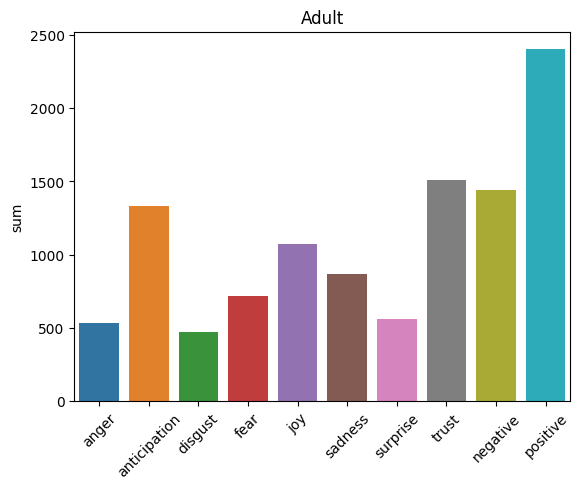

In [11]:
adult_sum = pd.DataFrame(adult.sum().iloc[3:-1], columns=['sum'])
sns.barplot(data=adult_sum, x=adult_sum.index, y="sum").set(title='Adult')
plt.xticks(rotation=45)
plt.show()

# Análisis bivariante

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/si

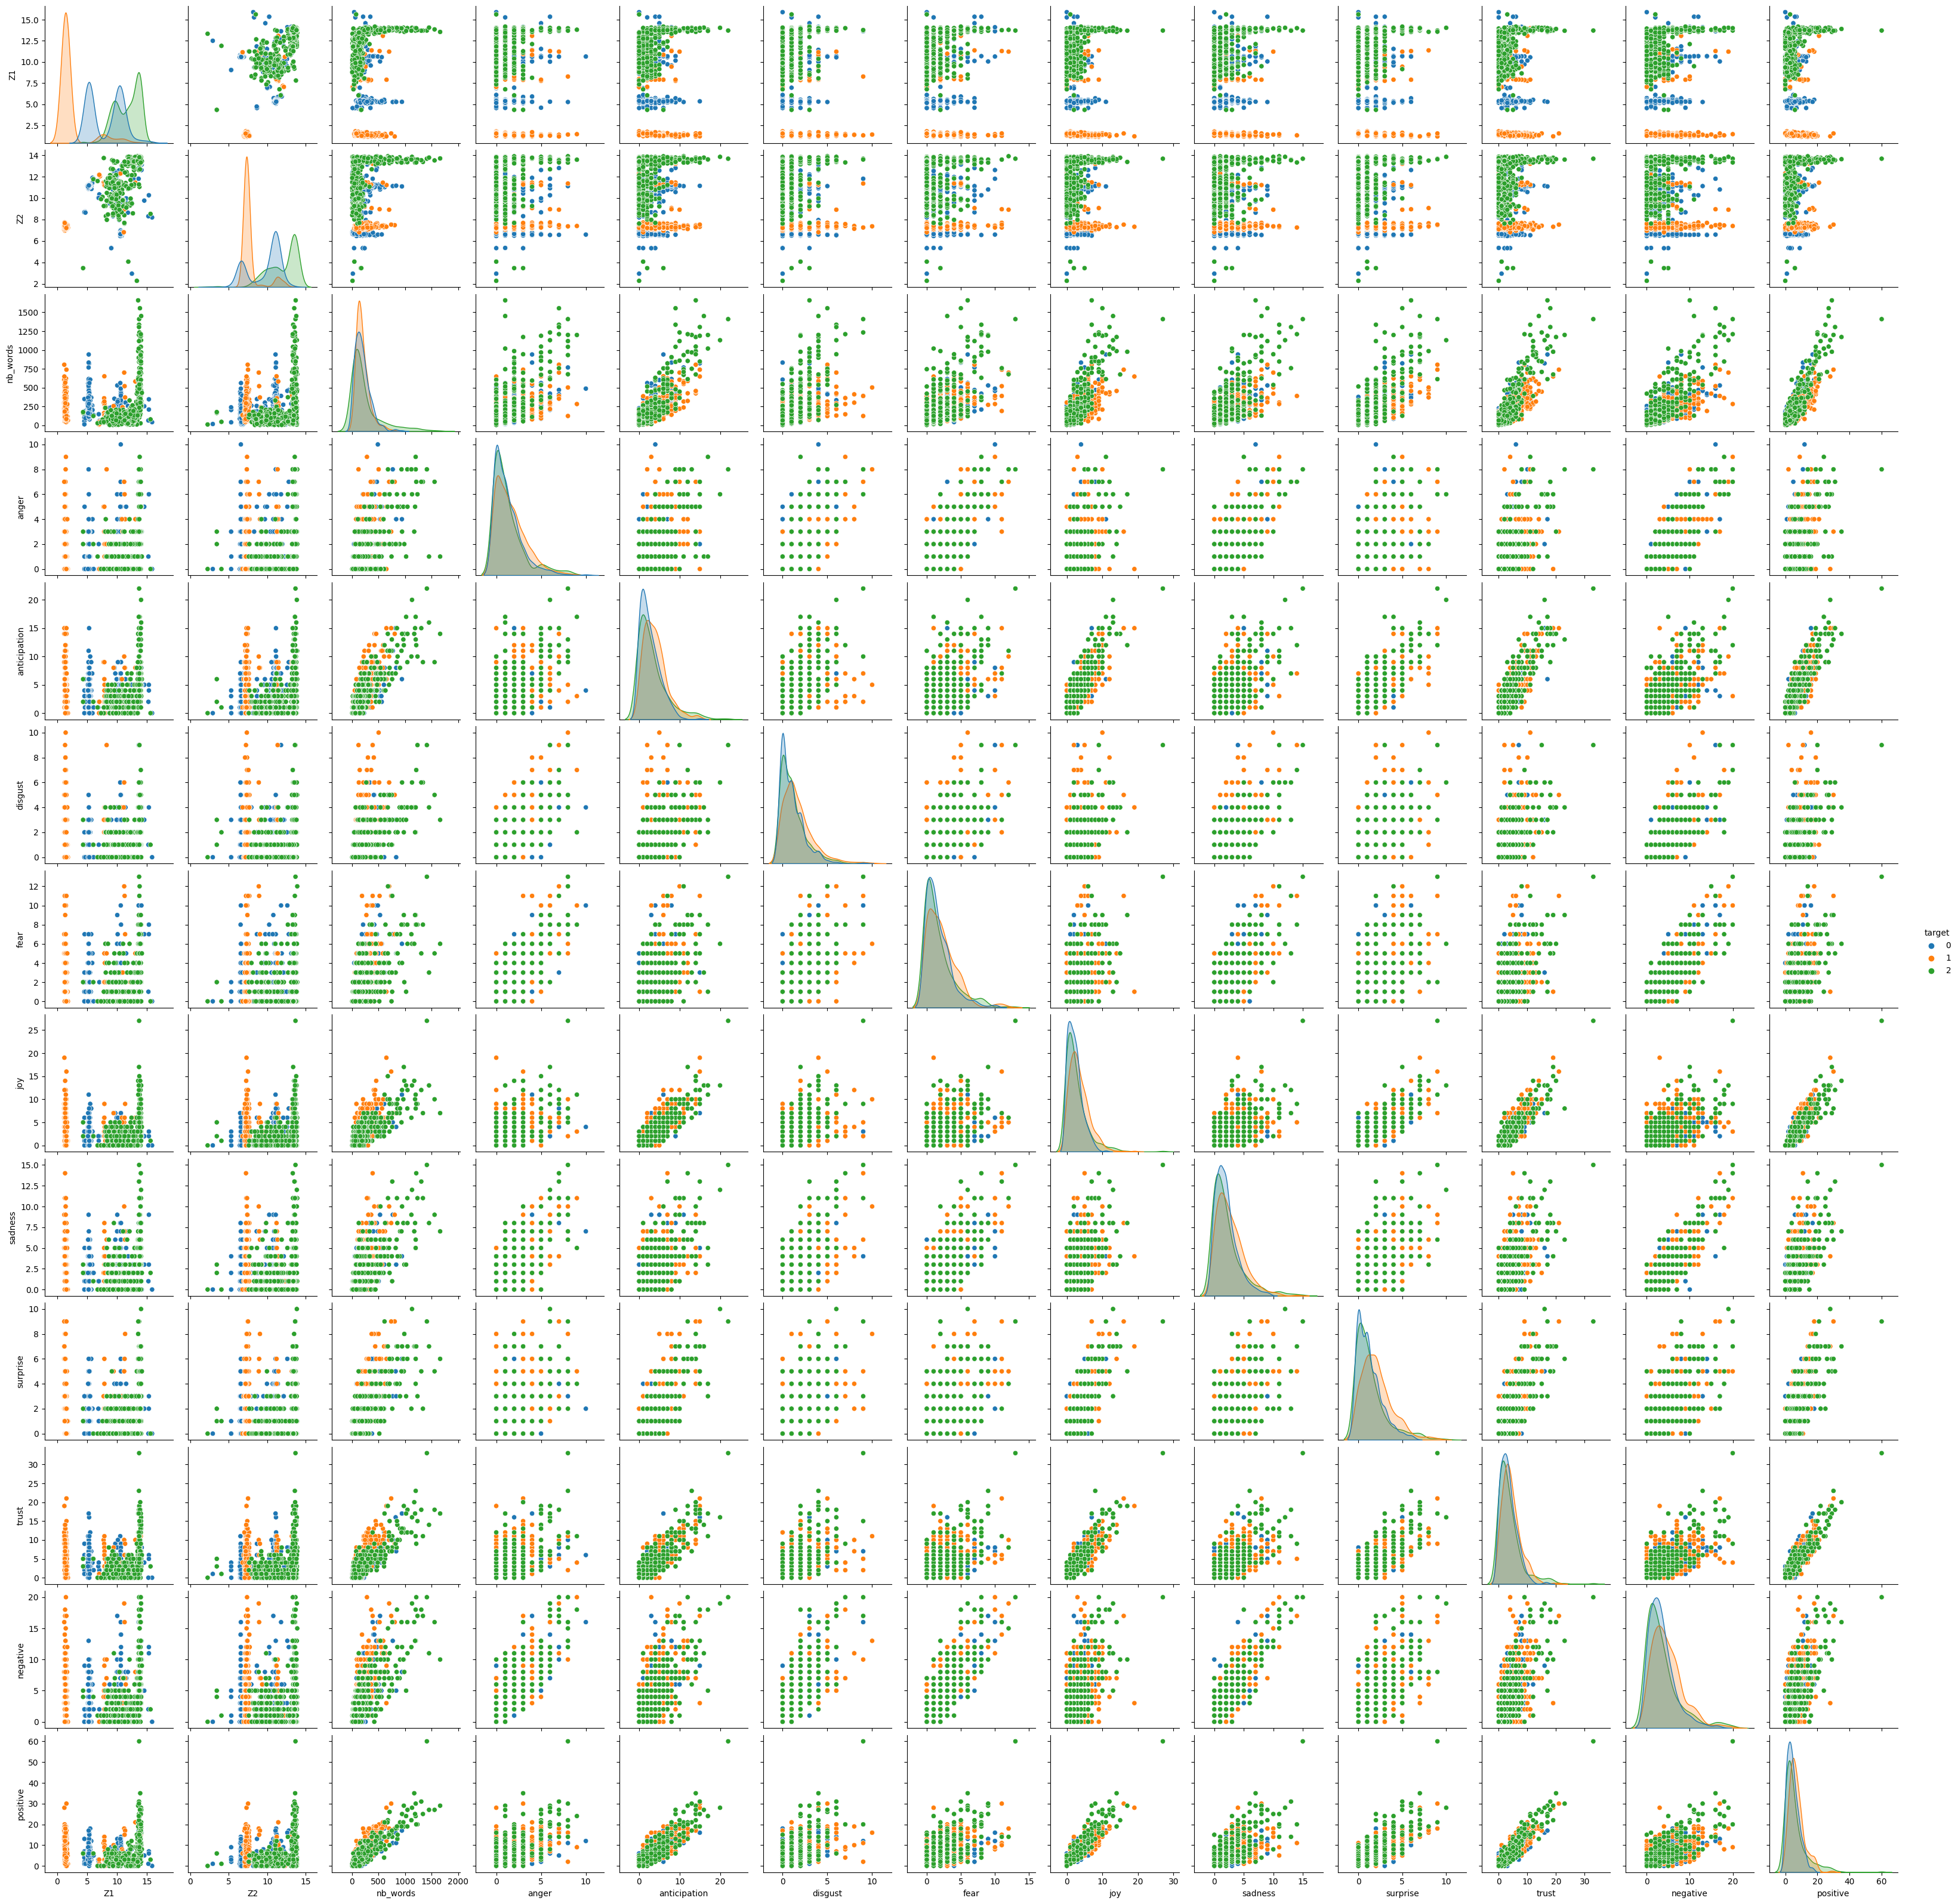

In [28]:
sns.pairplot(dreams_num, hue="target",palette=sns.color_palette())

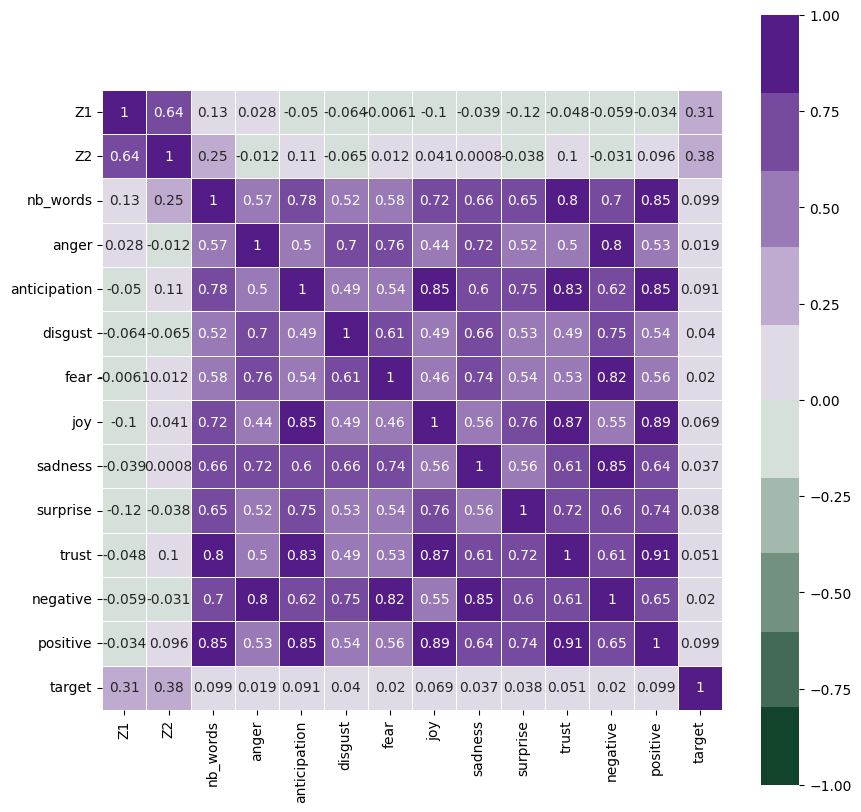

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(dreams_num.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);